In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pandas as pd

global count
global count2
count = 0
count2 =0

In [2]:
class Metropolis:
    def __init__(self,L,J=1,B=0):
        self.L = L
        self.N = L*L
        self.J = J
        self.B = B
        count1 = 0
        count2 = 0
        
        self.sc = np.ones(self.N,dtype=np.int0)
        self.prob = np.zeros(2,dtype=np.double)

    def prob_calc(self,beta):
        for i in range(2):
            # 4 8
            self.prob[i] = np.exp(-beta*4*(i+1))

    def measure(self,func):
        res = 0
        # print(self.sc)
        for i in range(self.N):
            sum = func(i)
            res += self.J*sum*self.sc[i]

        sigma = np.sum(self.sc)
        HH = -res -self.B*sigma

        return sigma, HH

    def helical(self,i):
        sum = 0

        nn = i + 1
        if(nn == self.N): nn = 0
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum

    
    def sweep_pbc(self,i):
        sum = 0

        nn = i -1
        if((nn+1 % self.L) == 0) : nn += self.L
        sum += self.sc[nn]

        nn = i + 1
        if(nn % self.L == 0): nn -= self.L
        sum += self.sc[nn]

        nn = i - self.L
        if(nn < 0): nn += self.N
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum
    
    def sweep_helical(self,i):
        sum = 0

        nn = i -1
        if(nn < 0) : nn += self.N
        sum += self.sc[nn]

        nn = i + 1
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]

        nn = i - self.L
        if(nn < 0): nn += self.N
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum

    def calculate(self):
        global count, count2
        for i in range(self.N):
            k = i
            # k = np.random.randint(self.N)
            # delta = Enew - Eold
            delta = 2*self.sc[k]*self.J*self.sweep_helical(k)
            count2 += 1
            # print(delta)
            if(delta <= 0): # A = 1
                count += 1
                self.sc[k] *= -1
            elif(np.random.rand() < self.prob[int(delta/4)-1]): #flip
                # print(delta, self.prob[int(delta/4)-1])
                count += 1
                self.sc[k] *= -1
        return 2*self.sc[k], delta

In [3]:
# temp = Metropolis(100)
# temp.prob_calc(1/(2.4)) #beta = T^-1
# temp.calculate()

In [4]:
np.exp(-1/(5)*8)

0.20189651799465538

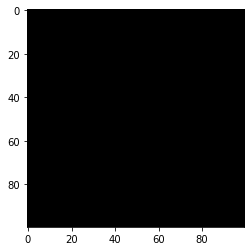

cnt = 10


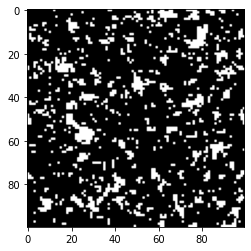

cnt = 20


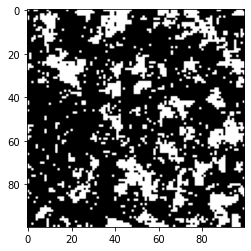

cnt = 40


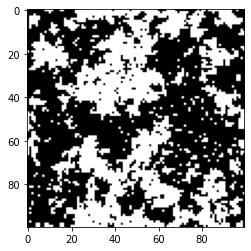

cnt = 60


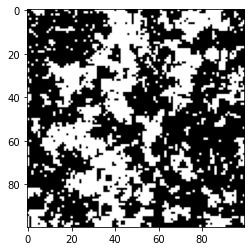

cnt = 100


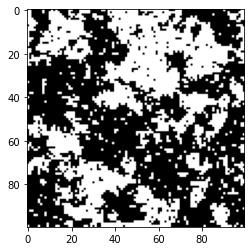

cnt = 200


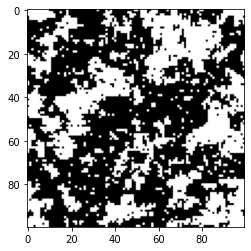

cnt = 400


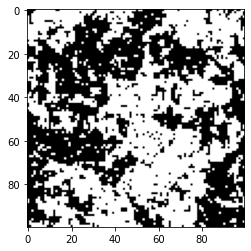

cnt = 1000


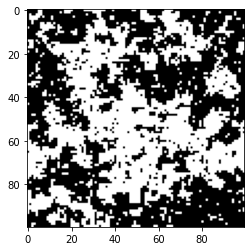

cnt = 2000


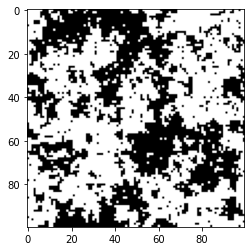

cnt = 3000


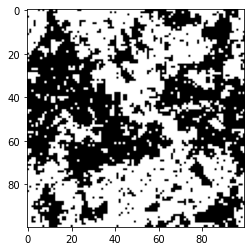

cnt = 4000


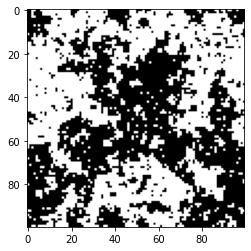

In [5]:
temp = Metropolis(100)
temp.prob_calc(1/(2.4)) #beta = T^-1
ls = [10,20,40,60,100,200,400,1000,2000,3000,4000,10000,100000]
cnt = 0
# i = 0
a = np.reshape(temp.sc,(temp.L,temp.L))
plt.imshow(a,cmap="gray")
plt.show()

for i in range(4001):
    if(i == ls[cnt]):
        cnt += 1
        a = np.reshape(temp.sc,(temp.L,temp.L))
        plt.imshow(a,cmap="Greys")
        print("cnt =",ls[cnt-1])
        plt.show()
    temp.calculate()

In [7]:
T = np.zeros(25,dtype=np.double)
m = np.zeros(25,dtype=np.double)
c = np.zeros(25,dtype=np.double)


for i in range(25):
    T[i] = 0.2*(i+1)

for j in range(25):
    count = 0
    count2 = 0
    M55 = Metropolis(5)
    M55.prob_calc(1/T[j])
    res = np.zeros(4,dtype=np.double)
    for i in range(2000):
        M55.calculate()
    sigma, HH = M55.measure(M55.helical)
    print("idx: ", j, "||",sigma,HH)
    for i in range(18000):
        M55.calculate()
        sigma, HH = M55.measure(M55.helical)
        res += np.array([np.absolute(sigma), sigma*sigma, HH, HH*HH])
    res /= 18000 
    m[j] = res[0]/M55.N
    c[j] = (1/T[j])**2*(res[3]-res[2]**2)/M55.N
    print(res)
    print(m[j],c[j],count, count2)
    print(M55.prob)


idx:  0 || 25 -50
[  25.  625.  -50. 2500.]
1.0 0.0 0 500000
[2.06115362e-09 4.24835426e-18]
idx:  1 || 25 -50
[  25.  625.  -50. 2500.]
1.0 0.0 0 500000
[4.53999298e-05 2.06115362e-09]
idx:  2 || 25 -50
[  24.99988889  624.99466667  -49.99955556 2499.95911111]
0.9999955555555556 0.0003950397805662456 2 500000
[1.27263380e-03 1.61959679e-06]
idx:  3 || 25 -50
[  24.99833333  624.92        -49.99333333 2499.38666667]
0.9999333333333333 0.003330555555578485 32 500000
[6.73794700e-03 4.53999298e-05]
idx:  4 || 25 -50
[  24.98044444  624.06755556  -49.92444444 2493.07733333]
0.9992177777777778 0.025087209876528505 384 500000
[0.01831564 0.00033546]
idx:  5 || 21 -38
[  24.92744444  621.544       -49.71955556 2474.38222222]
0.9970977777777777 0.06522271056240292 1448 500000
[0.03567399 0.00127263]
idx:  6 || 25 -50
[  24.78733333  614.98577778  -49.21266667 2428.78222222]
0.9914933333333333 0.14072779138322566 4264 500000
[0.05743262 0.00329851]
idx:  7 || 25 -50
[  24.48211111  601.2111111

In [ ]:
bin = 40
T = np.zeros(bin,dtype=np.double)
m = np.zeros(bin,dtype=np.double)
c = np.zeros(bin,dtype=np.double)
res = np.zeros((bin,4),dtype=np.double)

for i in range(bin):
    T[i] = 5/bin*(i+1)

for j in range(bin):
    count = 0
    count2 = 0
    M55 = Metropolis(5)
    M55.prob_calc(1/T[j])
    for i in range(2000):
        M55.calculate()
    sigma, HH = M55.measure(M55.helical)
    print("idx: ", j, "||",sigma,HH)
    for i in range(18000):
        M55.calculate()
        sigma, HH = M55.measure(M55.helical)
        res[j] += np.array([np.absolute(sigma), sigma*sigma, HH, HH*HH])
    res[j] /= 18000 
    m[j] = res[j][0]/M55.N
    c[j] = (1/T[j])**2*(res[j][3]-res[j][2]**2)/M55.N
    print(res[j])
    print(m[j],c[j],count, count2)
    # print(M55.prob)


idx:  0 || 25 -50
[  25.  625.  -50. 2500.]
1.0 0.0 0 500000
idx:  1 || 25 -50
[  25.  625.  -50. 2500.]
1.0 0.0 0 500000
idx:  2 || 25 -50
[  25.  625.  -50. 2500.]
1.0 0.0 0 500000
idx:  3 || 25 -50
[  25.  625.  -50. 2500.]
1.0 0.0 0 500000
idx:  4 || 25 -50
[  24.99988889  624.99466667  -49.99955556 2499.95911111]
0.9999955555555556 0.00036406866176985213 2 500000
idx:  5 || 25 -50
[  24.99955556  624.97866667  -49.99822222 2499.83644444]
0.9999822222222222 0.0010111332784678475 8 500000
idx:  6 || 25 -50
[  24.99533333  624.77688889  -49.98177778 2498.32888889]
0.9998133333333334 0.007877436694356478 92 500000
idx:  7 || 25 -50
[  24.98111111  624.09555556  -49.92555556 2493.16444444]
0.9992444444444445 0.024133876543219232 386 500000
idx:  8 || 25 -50
[  24.95411111  622.81155556  -49.82177778 2483.70311111]
0.9981644444444444 0.04720419311690443 930 500000
idx:  9 || 23 -42
[  24.89777778  620.14177778  -49.60977778 2464.46222222]
0.9959111111111111 0.0853035791802453 2010 50000

In [3]:
#autocorrection time

bin = 1
T = np.zeros(bin,dtype=np.double)

# for i in range(bin):
#     T[i] = 5/bin*(i+1)

T[0] = 2.4
Tmax = 2000

for j in range(bin):
    chi0 = np.zeros(Tmax)
    count = 0
    count2 = 0
    M55 = Metropolis(100)
    M55.prob_calc(1/T[j])
    for i in range(Tmax):
        M55.calculate()
        sigma, HH = M55.measure(M55.helical)
        chi0[i] = sigma/10000
    # print(M55.prob)

In [4]:
chi1 = np.zeros(Tmax)
for t in range(Tmax):
    k = Tmax-t
    t1 = 0
    t2 = 0
    t3 = 0
    for tp in range(Tmax-t):
        t1 += chi0[tp]*chi0[tp+t]
        t2 += chi0[tp]
        t3 += chi0[tp+t]
    chi1[t] = (1/k)*(t1-(1/k)*t2*t3)

In [6]:
chi0t = np.zeros(Tmax + 1)
for i in range(Tmax):
    chi0t[i+1] = chi0t[i] + chi1[i]
chi0t /= chi1[0]

In [72]:
#autocorrection time
T_auto = 2.4
epoch = 10000 #mcs

mlist = np.zeros(epoch)

M100100 = Metropolis(100)
M100100.prob_calc(1/T_auto)
for i in range(epoch):
    M100100.calculate()
    sigma, HH = M100100.measure(M100100.helical)
    mlist[i] = sigma/10000

m_expec = np.average(mlist)


In [73]:
auto_chi = np.zeros(epoch)
mlist2 = mlist-m_expec
for i in range(epoch):
    auto_chi[i] = np.average(mlist2[0:epoch-i]*mlist2[i:epoch])

In [74]:
auto_chi2 = np.zeros(epoch)
for i in range(epoch):
    auto_chi2[i] = np.sum(mlist[0:epoch-i]*mlist[i:epoch])/(epoch-i) -np.sum(mlist[0:epoch-i])*np.sum(mlist[i:epoch])/(epoch-1)**2

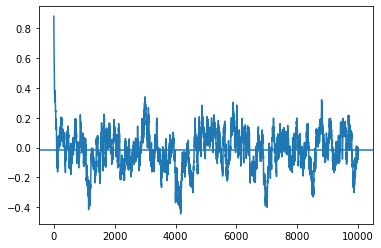

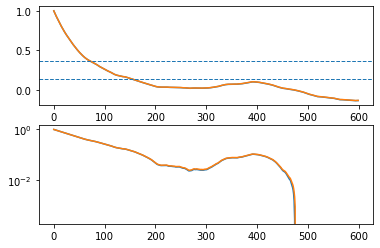

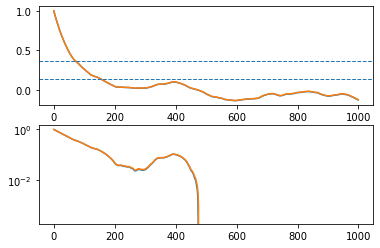

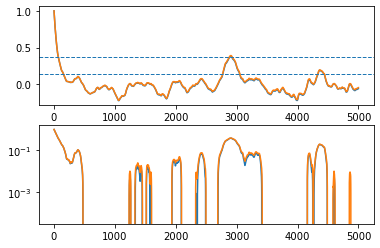

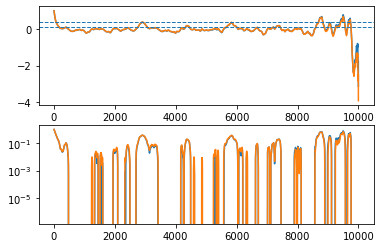

In [88]:
plt.plot(np.arange(0,epoch),mlist)
plt.axhline(m_expec)
plt.show()

slice = [600,1000,5000,10000]
for _bin in slice:
    plt.subplot(2,1,1)
    plt.plot(np.arange(0,_bin),auto_chi[0:_bin]/auto_chi[0])
    plt.plot(np.arange(0,_bin),auto_chi2[0:_bin]/auto_chi2[0])
    plt.axhline(1/np.e,linestyle='--',lw=1)
    plt.axhline(1/np.e**2,linestyle='--',lw=1)

    plt.subplot(2,1,2)
    plt.semilogy(np.arange(0,_bin),auto_chi[0:_bin]/auto_chi[0])
    plt.semilogy(np.arange(0,_bin),auto_chi2[0:_bin]/auto_chi2[0])
    plt.show()

C:\Users\Seongsu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


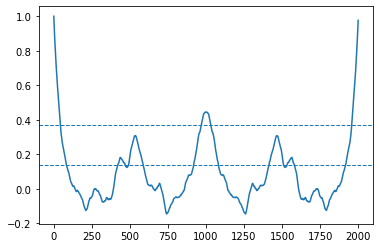

In [9]:
plt.plot(np.arange(0,Tmax),chi3/max(chi3))
plt.axhline(1/np.e,linestyle='--',lw=1)
plt.axhline(1/np.e**2,linestyle='--',lw=1)

plt.show()

In [ ]:
Data = pd.DataFrame(T,columns=['temperature'])
Data.insert(1,'magnetization',m)
Data.insert(2,'specific heat',c)
Data.insert(3,'abs(sigma)',res[:,0])
Data.insert(4,'sigma**2',res[:,1])
Data.insert(5,'HH',res[:,2])
Data.insert(6,'HH**2',res[:,3])
# pd.DataFrame(m,columns=['magneization'])

Data.to_csv("Metropolis_python.csv")

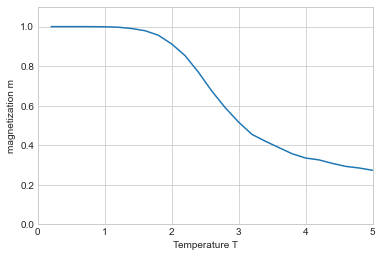

In [ ]:
y = m/max(m)

plt.style.use('seaborn-whitegrid')
plt.ylim(0,1.1)
plt.xlim(0,5)
plt.plot(T,y)

plt.ylabel('magnetization m')
plt.xlabel('Temperature T')
plt.show()

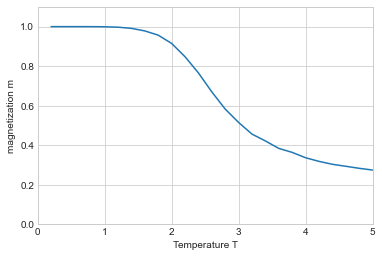

In [ ]:
y = m/max(m)

plt.style.use('seaborn-whitegrid')
plt.ylim(0,1.1)
plt.xlim(0,5)
plt.plot(T,y)

plt.ylabel('magnetization m')
plt.xlabel('Temperature T')
plt.show()

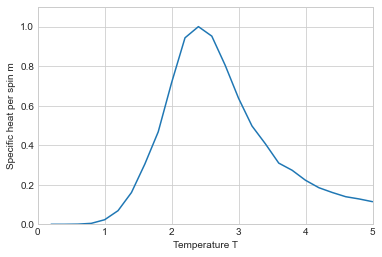

In [ ]:
y = c/max(c)

plt.style.use('seaborn-whitegrid')
plt.ylim(0,1.1)
plt.xlim(0,5)
plt.plot(T,y)

plt.ylabel('Specific heat per spin m')
plt.xlabel('Temperature T')
plt.show()